<a href="https://colab.research.google.com/github/Muchiri-cmd/Linear_Regression/blob/main/Linear_Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np # creates numerical data and noise
import matplotlib.pyplot as plt # we use this to visualize data and results
#we use this to build and train the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
#Objective: To create synthetic data

np.random.seed(42) # This ensures results are reproducible

#generate 100 random x values each between 0 and 10
#shape(1000,1) - 1000 data point, 1 feature per point
x = np.random.rand(1000, 1) * 10

In [12]:
#These are the ground truth params - we want to check whether model discovers this on its own
m = 3 #true slope
b = 10  #true intercept


# m * X + b -> perfect straight line
#noise - randomness (Gaussian)
noise = np.random.randn(1000, 1)
y = m * x + b + noise

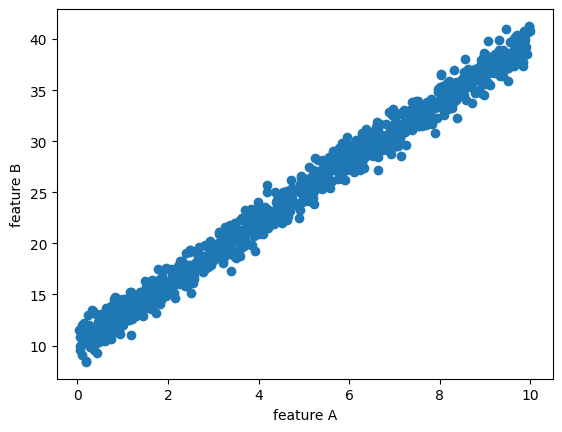

In [13]:
plt.scatter(x, y)
plt.xlabel("feature A")
plt.ylabel("feature B")
plt.title("")
plt.show()

In [14]:
#Here we define model structure
# use sequential API - data flows in 1 direction
model = Sequential()

#add a dense layer - 1 neuron,weight and bias - internally the model computres y = weight *x + bias -> Linear regression
#NB -> linear regression is a neural network with 1 neuron and no activation func
model.add(Dense(1, input_shape=(1,)))

In [15]:
#Here objective is to compile model i.e tell it how to measure and correct mistakes
# we use SGD as optimizer to adjust weight and bias
# we use MSE to measure wrong predictions and penalize large errors
model.compile(
    optimizer='sgd',
    loss='mse'
)

In [20]:
# Train Model
#For each epoch of 50 , predict y using current weight and bias, compare and compute loss w adjustments

history = model.fit(x, y, epochs=50, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9761 
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9780
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0353
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0408 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9697 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9568 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0092 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0301 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0099 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9707 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9643 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9541 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9950 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9802 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0838 
Epoch 

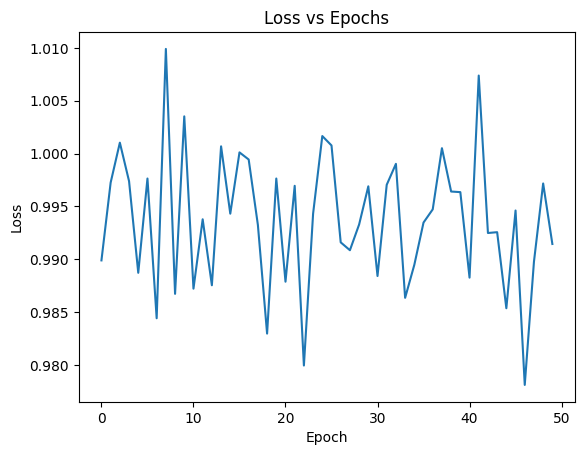

In [21]:
#plot loss vs epochs
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [22]:
#Extract learned paramsw verify whether model has learned correct r/ship
weights, bias = model.layers[0].get_weights()

learned_m = weights[0][0]
learned_b = bias[0]

In [23]:
#comparison w true values
print("True slope (m):", m)
print("Learned slope:", learned_m)

print("True intercept (b):", b)
print("Learned intercept:", learned_b)

True slope (m): 3
Learned slope: 2.985245
True intercept (b): 10
Learned intercept: 10.173775


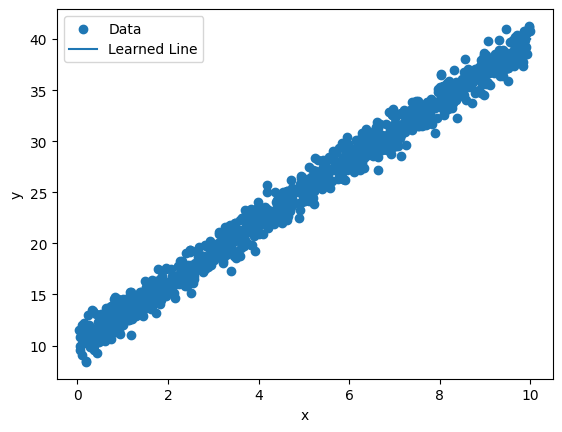

In [24]:
#visual proof
plt.scatter(x, y, label="Data")
plt.plot(x, learned_m * x + learned_b, label="Learned Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()